# Initiation

In [1]:

# To manipulate arrays
import numpy as np 
# To handle track DataFrames
import pandas as pd
# For working with x-arrays
import xarray as xr
# To import images
from skimage import io 
from skimage.io import imread
# For TrackPy
# To make plots
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()  
# For directories 
import os
import pathlib  # for working with windows paths
# For reloading a library when testing
# For deleting/reloading modules in another file for code testing
# Import trackArrayTools
cwd = os.getcwd()
os.chdir("../croparray")
import crop_array_tools as ca
os.chdir(cwd)
# To work inline; change to %matplotlib notebook for interactive plotting
%matplotlib inline 
plt.style.use('dark_background')


# Directories

In [2]:
# Main directory
current_dir = pathlib.Path().absolute()
images_directory = current_dir.parents[0].joinpath('dataBase').joinpath('FISH_Analysis','GAPDH_Exon_Cy5_short') 

# Directories for images and database
image_1_dir = images_directory.joinpath('ROI001_XY1620755243_Z00_T0_merged.tif')
image_2_dir = images_directory.joinpath('ROI002_XY1620755646_Z00_T0_merged.tif')
database_dir =  current_dir.parents[0].joinpath('dataBase').joinpath('FISH_Analysis','dataframe_GAPDH_Exon_Cy5_short.csv')


# Loading images

In [8]:
# Reading  images as numpy arrays
image_1 = imread(image_1_dir)  # [Z,Y,X,C]
image_2 = imread(image_2_dir)  # [Z,Y,X,C]
image_2.shape

(23, 928, 624, 3)

In [16]:
# Creating an array for croparray with dimensions (fov, f = frame, z, y, x, ch)
image_concatenated = np.concatenate((image_1[...,np.newaxis],image_2[...,np.newaxis]),axis=4) # concatenating the two arrays
image_new_order= np.moveaxis(image_concatenated,4,0) # moving axis to change dim from [Z,Y,X,C,fov] to [fov,Z,Y,X,C]
image_for_croparray = np.expand_dims(image_new_order,axis=1) # adding a dimension for f =frame
image_for_croparray.shape   # The final array with format: (fov, f = frame, z, y, x, ch)

(2, 1, 23, 928, 624, 3)

# Loading dataframe

In [21]:
# Loading original dataframe
spots = pd.read_csv(database_dir) 
spots

,Unnamed: 0,image_id,cell_id,spot_id,nucleus_y,nucleus_x,nuc_area_px,cyto_area_px,cell_area_px,z,y,x,is_nuc,is_cluster,cluster_size,spot_type,is_cell_fragmented
0,0,0,0,0,154,484,14640,24893,39533,4,145,469,1,1,2,0,0
1,1,0,0,1,154,484,14640,24893,39533,5,111,507,1,1,2,0,0
2,2,0,0,2,154,484,14640,24893,39533,6,135,460,1,1,2,0,0
3,3,0,0,3,154,484,14640,24893,39533,6,200,460,1,1,2,0,0
4,4,0,0,4,154,484,14640,24893,39533,7,144,447,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6323,6323,1,17,27,519,21,4079,13896,15502,11,566,13,1,0,0,0,0
6324,6324,1,17,28,519,21,4079,13896,15502,6,459,6,1,0,0,0,0
6325,6325,1,17,29,519,21,4079,13896,15502,9,573,13,1,0,0,0,0
6326,6326,1,17,30,519,21,4079,13896,15502,7,609,1,0,0,0,0,0


In [22]:
# Dataframe for croparray
spots['f']= 0   # Adding a column with zeros for frame
# renaming some fields
spots.rename(columns={'x': 'xc','y': 'yc', 'z': 'zc', 'image_id': 'fov'}, inplace=True, errors='raise')
spots = spots[['fov','f','zc','yc','xc']]  
spots.head()

,fov,f,zc,yc,xc
0,0,0,4,145,469
1,0,0,5,111,507
2,0,0,6,135,460
3,0,0,6,200,460
4,0,0,7,144,447


# Creating a croparray

In [23]:
my_ca = ca.create_crop_array(image_for_croparray,spots,xy_pad=5)
my_ca

Original video dimensions:  (2, 1, 23, 928, 624, 3)
Padded video dimensions:  (2, 1, 23, 940, 636, 3)
Max # of spots per frame:  3792
Shape of numpy array to hold all crop intensity data:  (2, 3792, 1, 23, 11, 11, 3)
Shape of xc and yc numpy arrays:  (2, 3792, 1, 3)
Shape of extra my_layers numpy array:  (1, 2, 3792, 1)


/Users/luisaguilera/Desktop/croparray/croparray/crop_array_tools.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['n'] = my_crops.cumcount() # Create a new column 'n' as a cumulative counter of spots per frame per fov


<xarray.Dataset>
Dimensions:  (fov: 2, n: 3792, t: 1, z: 23, y: 11, x: 11, ch: 3)
Coordinates:
  * fov      (fov) int64 0 1
  * n        (n) int16 0 1 2 3 4 5 6 7 ... 3785 3786 3787 3788 3789 3790 3791
  * t        (t) int64 0
  * z        (z) int64 0 1 2 3 4 5 6 7 8 9 10 ... 13 14 15 16 17 18 19 20 21 22
  * y        (y) int64 -5 -4 -3 -2 -1 0 1 2 3 4 5
  * x        (x) int64 -5 -4 -3 -2 -1 0 1 2 3 4 5
  * ch       (ch) int64 0 1 2
Data variables:
    int      (fov, n, t, z, y, x, ch) int64 578 423 910 804 1186 ... 0 0 0 0 0
    xc       (fov, n, t, ch) int64 475 475 475 513 513 513 466 ... 0 0 0 0 0 0 0
    yc       (fov, n, t, ch) int64 151 151 151 117 117 117 141 ... 0 0 0 0 0 0 0
    dx       int64 1
    dy       int64 1
    dz       int64 1
    dt       int64 1
    xy_pad   int64 5
    zc       (fov, n, t) float64 4.0 5.0 6.0 6.0 7.0 8.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    name:     video_filename
    date:     video_date

In [57]:
crop_array = ca.montage(my_ca, row = 'z', col = 'n').int.sel(ch=1)
crop_array.shape

(2, 1, 253, 41712)

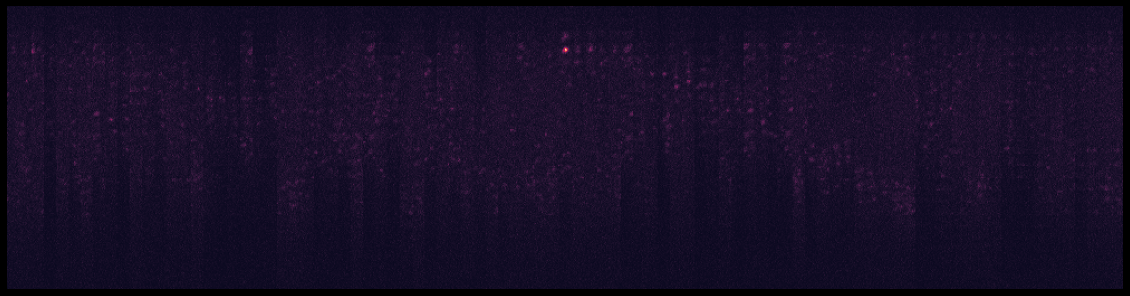

In [53]:
# Plotting
f = plt.figure(figsize=(20,15))
ax = plt.gca()
#plt.imshow(np.max(crop_array[1,0,:,:,:],axis=0))
plt.imshow(crop_array[1,0,:,0:1000])
#plt.imshow(np.max(crop_array[0,0,:,:],axis=0))
#plt.title("x_spots x y_time")
plt.grid(False)
plt.axis('off')
plt.show()